In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srikresna","key":"c90f9c19af6b129911ae9410dd23cde4"}'}

In [ ]:
!mkdir ~/.kaggle/

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d irvingvasquez/cactus-aerial-photos

In [ ]:
!unzip cactus-aerial-photos.zip

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

<h1> Siapkan Dataset

In [ ]:
# Tentukan path ke direktori dataset
train_cactus_dir = '/content/training_set/training_set/cactus'
train_no_cactus_dir = '/content/training_set/training_set/no_cactus'
test_cactus_dir = '/content/validation_set/validation_set/cactus'
test_no_cactus_dir = '/content/validation_set/validation_set/no_cactus'

In [ ]:
img = Image.open("/content/training_set/training_set/cactus/cactus_0028_108.jpg")
print(img.size)
# img.show()

(54, 54)


In [ ]:
# Fungsi untuk memuat dan memproses gambar
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        if img is not None:
            # # Ubah gambar ke grayscale
            img = img.convert('L')
            # Resize gambar ke ukuran yang sama
            img = img.resize((32, 32))
            images.append(np.array(img))
            labels.append(label)
    return images, labels

# Muat data train dan test
train_images_cactus, train_labels_cactus = load_images_from_folder(train_cactus_dir, 1)
train_images_no_cactus, train_labels_no_cactus = load_images_from_folder(train_no_cactus_dir, 0)
test_images_cactus, test_labels_cactus = load_images_from_folder(test_cactus_dir, 1)
test_images_no_cactus, test_labels_no_cactus = load_images_from_folder(test_no_cactus_dir, 0)

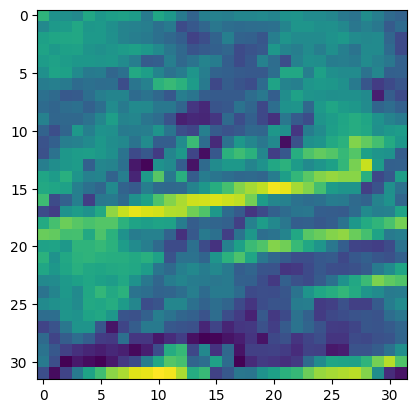

In [ ]:
plt.imshow(train_images_cactus[0])

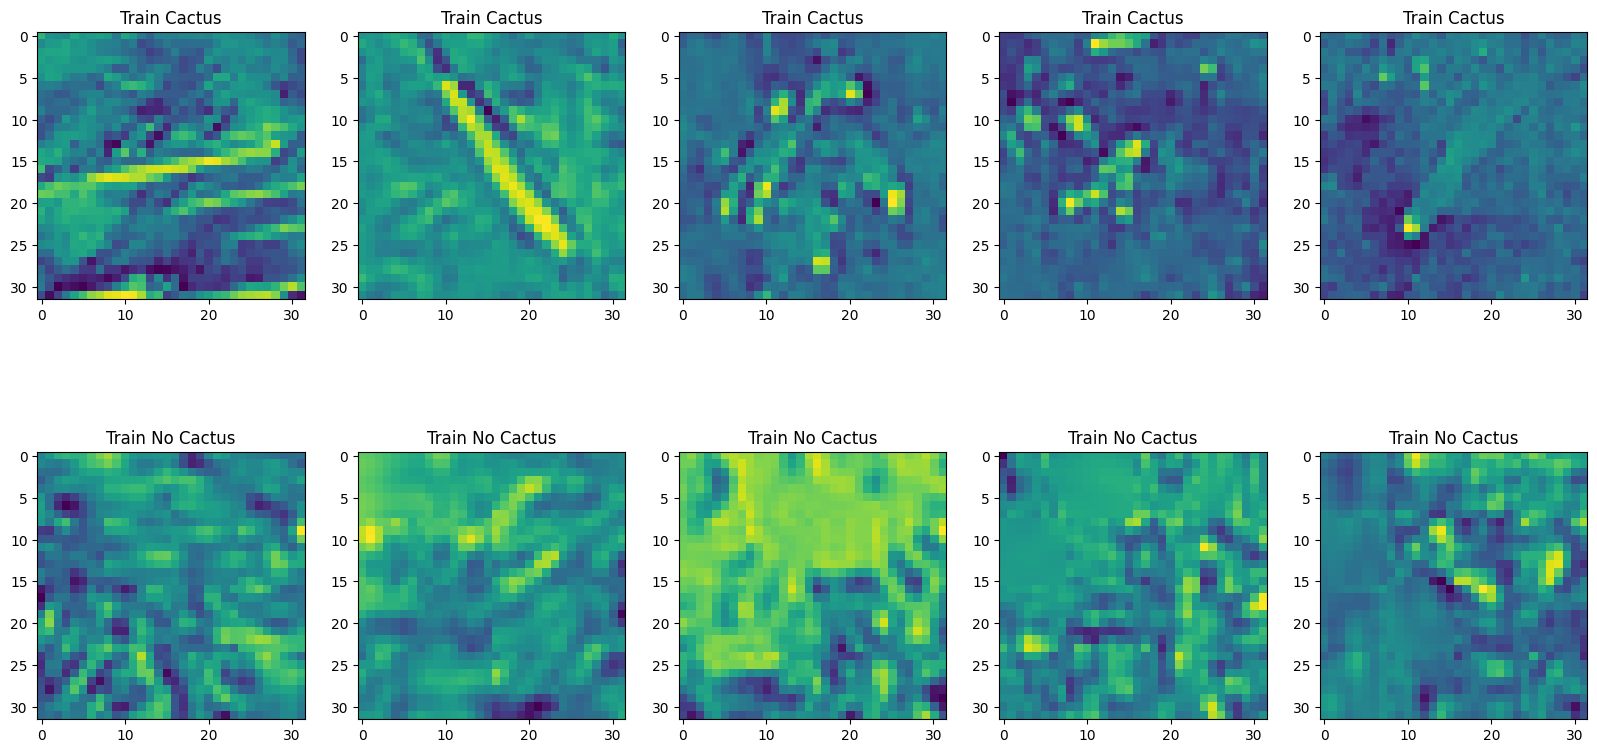

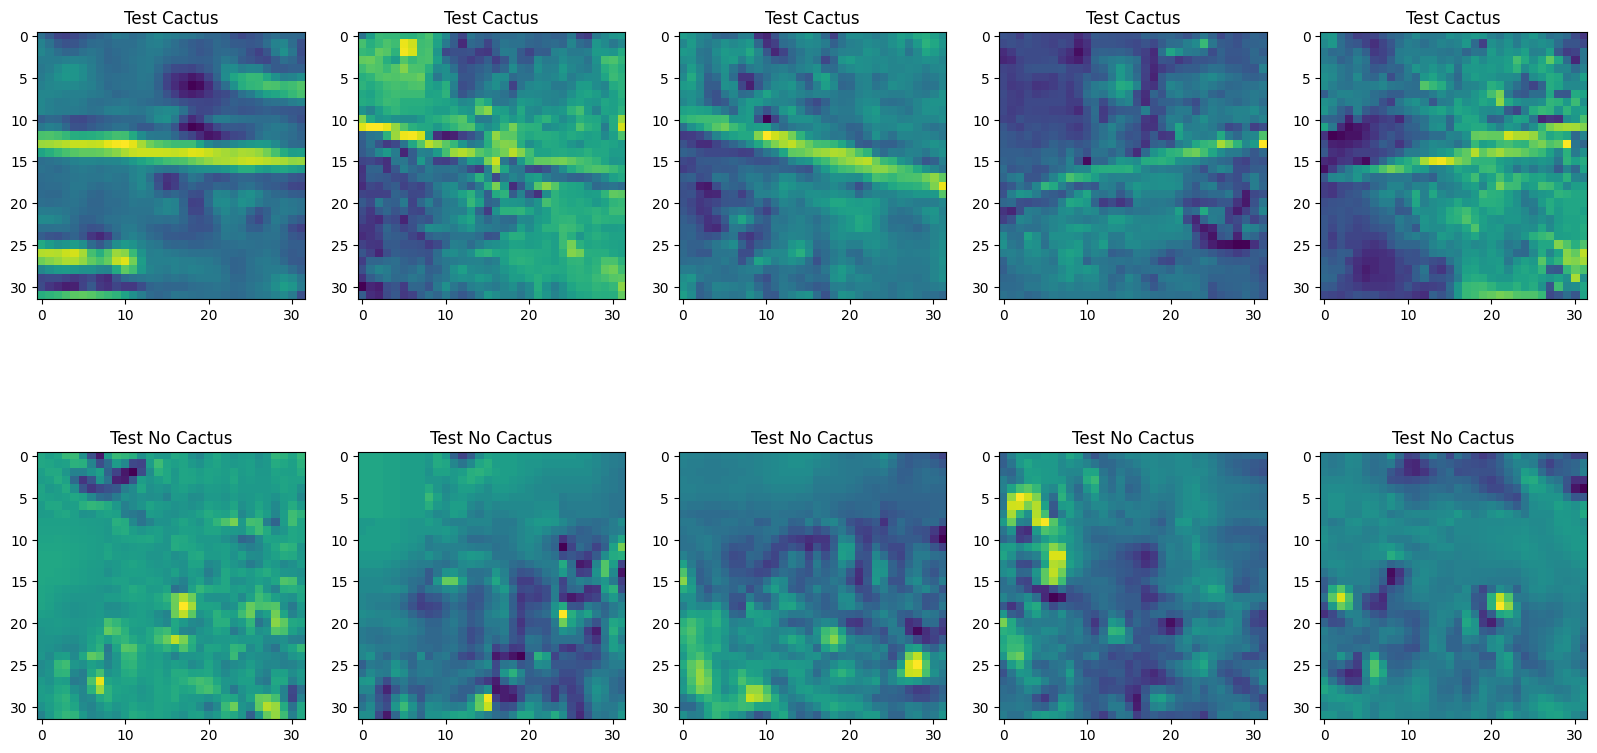

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(5):
    ax[0, i].imshow(train_images_cactus[i])
    ax[0, i].set_title('Train Cactus')
    ax[1, i].imshow(train_images_no_cactus[i])
    ax[1, i].set_title('Train No Cactus')
plt.show()

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(5):
    ax[0, i].imshow(test_images_cactus[i])
    ax[0, i].set_title('Test Cactus')
    ax[1, i].imshow(test_images_no_cactus[i])
    ax[1, i].set_title('Test No Cactus')
plt.show()

In [ ]:
# Gabungkan dan ubah data train dan test menjadi numpy array
train_images = np.array(train_images_cactus + train_images_no_cactus)
train_labels = np.array(train_labels_cactus + train_labels_no_cactus)
test_images = np.array(test_images_cactus + test_images_no_cactus)
test_labels = np.array(test_labels_cactus + test_labels_no_cactus)

In [ ]:
# Normalisasi data gambar
train_images = train_images / 255.0
test_images = test_images / 255.0

<h1> Multi Layer Perceptron

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32)),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid") # karena kasus ini binary classification jadi pakai sigmoid
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy() # karena sigmoid maka metric yg dipakai binary accuracy
)

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 1024)              0         
                                                                 
 dense_55 (Dense)            (None, 512)               524800    
                                                                 
 dense_56 (Dense)            (None, 256)               131328    
                                                                 
 dense_57 (Dense)            (None, 128)               32896     
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                                 
Total params: 697345 (2.66 MB)
Trainable params: 6973

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('binary_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
History = model.fit(
        x = train_images,
        y = train_labels,
        validation_data=(test_images, test_labels),
        batch_size = 128,
        epochs = 20,
        verbose = 1,
        callbacks=[callbacks]
)

Epoch 1/20
137/137 [==============================] - 4s 21ms/step - loss: 0.5771 - binary_accuracy: 0.7506 - val_loss: 0.5906 - val_binary_accuracy: 0.7500
Epoch 2/20
137/137 [==============================] - 3s 25ms/step - loss: 0.4742 - binary_accuracy: 0.7709 - val_loss: 0.4388 - val_binary_accuracy: 0.7928
Epoch 3/20
137/137 [==============================] - 2s 18ms/step - loss: 0.4233 - binary_accuracy: 0.7901 - val_loss: 0.4178 - val_binary_accuracy: 0.8020
Epoch 4/20
137/137 [==============================] - 2s 18ms/step - loss: 0.4097 - binary_accuracy: 0.7998 - val_loss: 0.4704 - val_binary_accuracy: 0.7487
Epoch 5/20
137/137 [==============================] - 2s 17ms/step - loss: 0.4107 - binary_accuracy: 0.8001 - val_loss: 0.4538 - val_binary_accuracy: 0.7550
Epoch 6/20
137/137 [==============================] - 2s 18ms/step - loss: 0.4052 - binary_accuracy: 0.8031 - val_loss: 0.4123 - val_binary_accuracy: 0.7983
Epoch 7/20
137/137 [==============================] - 4s 2

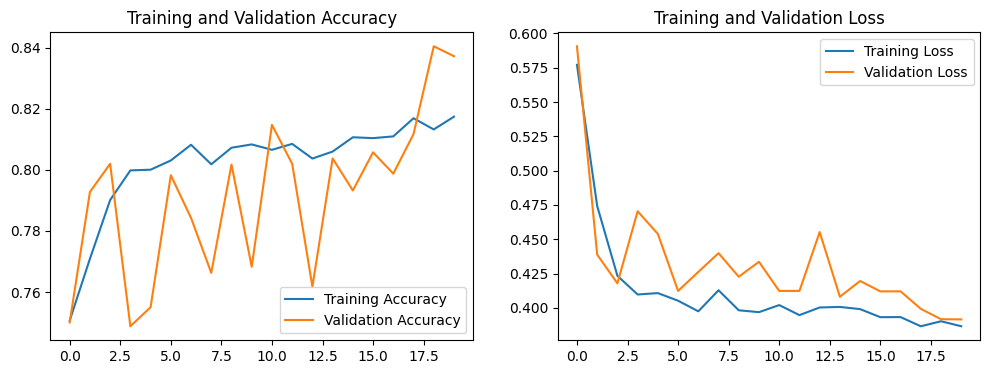

In [ ]:
# Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(History.history['binary_accuracy'], label='Training Accuracy')
plt.plot(History.history['val_binary_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h1> Convolutional Neural Network

In [151]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

In [156]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

In [157]:
cnn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)       

In [158]:
History = cnn.fit(
        x = train_images,
        y = train_labels,
        validation_data=(test_images, test_labels),
        batch_size = 128,
        epochs = 20,
        verbose = 1,
        callbacks=[callbacks]
)

Epoch 1/20
137/137 [==============================] - 24s 154ms/step - loss: 0.3843 - binary_accuracy: 0.8314 - val_loss: 0.2437 - val_binary_accuracy: 0.9068
Epoch 2/20
137/137 [==============================] - ETA: 0s - loss: 0.2293 - binary_accuracy: 0.9057
Akurasi telah mencapai >90%!
137/137 [==============================] - 23s 165ms/step - loss: 0.2293 - binary_accuracy: 0.9057 - val_loss: 0.2058 - val_binary_accuracy: 0.9145
